In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print('train set:', X_train.shape) 
print('test set:', X_test.shape)
#On normalise les données 
X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 22s 2us/step
train set: (60000, 28, 28)
test set: (10000, 28, 28)


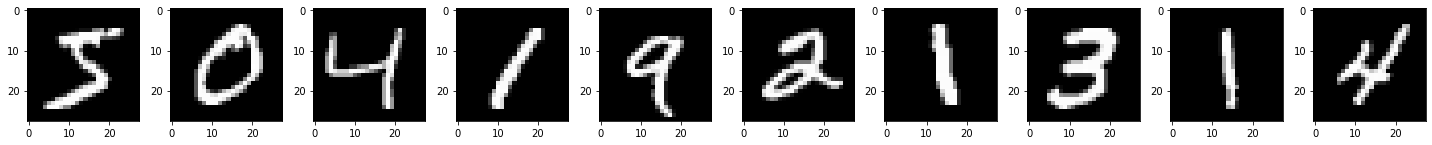

In [3]:
# visualisation des 10 premiers images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

# Configuration des couches

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilation de modèle

In [5]:
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement de modèle 

In [6]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2322 - accuracy: 0.9306
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0983 - accuracy: 0.9703
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9793


# Evaluation sur les données de test

In [7]:
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9748
Test accuracy: 0.9747999906539917


# Modèle prédictif

In [8]:
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)
print(predictions[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
